<a href="https://colab.research.google.com/github/phongloihong/image-retrieval/blob/main/image_retrievel_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chromadb --quiet
!pip install open-clip-torch --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 45.9 MB/s eta 0:00:0

In [ ]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

In [ ]:
!gdown 1HcpDl9tjqwbOWhSKG38sM0n3XNTA8sOU

Downloading...
From (original): https://drive.google.com/uc?id=1HcpDl9tjqwbOWhSKG38sM0n3XNTA8sOU
From (redirected): https://drive.google.com/uc?id=1HcpDl9tjqwbOWhSKG38sM0n3XNTA8sOU&confirm=t&uuid=d44ddd31-9ce2-4c13-8633-0370f37631a6
To: /content/data.zip
100% 76.1M/76.1M [00:00<00:00, 120MB/s]


In [ ]:
!ls /content
!unzip data.zip -d /content

data.zip  sample_data
Archive:  data.zip
   creating: /content/data/
   creating: /content/data/.ipynb_checkpoints/
   creating: /content/data/test/
   creating: /content/data/test/American_egret/
  inflating: /content/data/test/American_egret/n02009912_2473.JPEG  
   creating: /content/data/test/Doberman/
  inflating: /content/data/test/Doberman/n02107142_52285.JPEG  
   creating: /content/data/test/Rhodesian_ridgeback/
  inflating: /content/data/test/Rhodesian_ridgeback/n02087394_18723.JPEG  
   creating: /content/data/test/African_crocodile/
  inflating: /content/data/test/African_crocodile/n01697457_18534.JPEG  
   creating: /content/data/test/Lakeland_terrier/
  inflating: /content/data/test/Lakeland_terrier/n02095570_4644.JPEG  
   creating: /content/data/test/ambulance/
  inflating: /content/data/test/ambulance/n02701002_2311.JPEG  
   creating: /content/data/test/apiary/
  inflating: /content/data/test/apiary/n02727426_4398.JPEG  
   creating: /content/data/test/bannister/
  in

## Using CLIP to extract features from images to vectors

In [ ]:
embedding_function = OpenCLIPEmbeddingFunction()

def get_single_image_embedding(image):
    embedding = embedding_function._encode_image(image=np.array(image))
    return embedding

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
ROOT = 'data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))
HNSW_SPACE = "hnsw:space"
print(CLASS_NAME)

['African_crocodile', 'American_egret', 'Doberman', 'Lakeland_terrier', 'Orange_easy', 'Rhodesian_ridgeback', 'ambulance', 'apiary', 'bannister', 'barn_spider', 'basketball', 'black_widow', 'brain_coral', 'bullet_train', 'can_opener', 'capuchin', 'car_mirror', 'carousel', 'castle', 'china_cabinet', 'cliff_dwelling', 'comic_book', 'conch', 'cornet', 'dugong', 'electric_locomotive', 'flamingo', 'flatworm', 'goldfish', 'grocery_store', 'guillotine', 'half_track', 'hen-of-the-woods', 'horizontal_bar', 'killer_whale', 'kit_fox', 'knee_pad', 'lion', 'loudspeaker', 'lynx', 'magpie', 'meat_loaf', 'mixing_bowl', 'parachute', 'pizza', 'ram', 'red-backed_sandpiper', 'ruffed_grouse', 'safety_pin', 'scabbard', 'screen', 'steam_locomotive', 'steel_arch_bridge', 'theater_curtain', 'traffic_light', 'triceratops', 'vine_snake', 'warplane', 'white_stork', 'yawl']


In [17]:
def read_image_from_path(path, size):
  img = Image.open(path).convert('RGB').resize(size)
  return np.array(img)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)

    images_path = np.array(images_path)
    return images_np, images_path

## Query embedding vector with L1 Distance

In [41]:
def absolute_difference(query, data):
  axis_bath_size = tuple(range(1, len(data.shape)))
  return np.sum(np.abs(data - query), axis=axis_bath_size)

def mean_square_difference(query, data):
  axis_batch_size = tuple(range(1, len(data.shape)))
  return np.mean((data - query) ** 2, axis=axis_batch_size)

def cosine_similarity(query, data):
  query = np.asarray(query)
  data = np.asarray(data)

  axis_batch_size = tuple(range(1,len(data.shape)))
  query_norm = np.sqrt(np.sum(query**2)).astype(float)
  data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size)).astype(float)
  return np.sum(data * query, axis=axis_batch_size) / (query_norm.astype(float)*data_norm.astype(float) + np.finfo(float).eps)

def correlation_coefficient(query, data):
  query = np.asarray(query)
  data = np.asarray(data)

  axis_batch_size = tuple(range(1,len(data.shape)))
  query_mean = query - np.mean(query)
  data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
  query_norm = np.sqrt(np.sum(query_mean**2))
  data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

  return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)


In [ ]:
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

In [39]:
def get_score(root_img_path, query_path, size, calculate_func):
  query = read_image_from_path(query_path, size)
  query_embedding = get_single_image_embedding(query)
  ls_path_score = []
  for folder in os.listdir(root_img_path):
      if folder in CLASS_NAME:
          path = root_img_path + folder
          images_np, images_path = folder_to_images(path, size)
          embedding_list = []
          for idx_img in range(images_np.shape[0]):
              embedding = get_single_image_embedding(images_np[idx_img].astype(np.uint8))
              embedding_list.append(embedding)
          rates = calculate_func(query_embedding, np.stack(embedding_list))
          ls_path_score.extend(list(zip(images_path, rates)))
  return query, ls_path_score

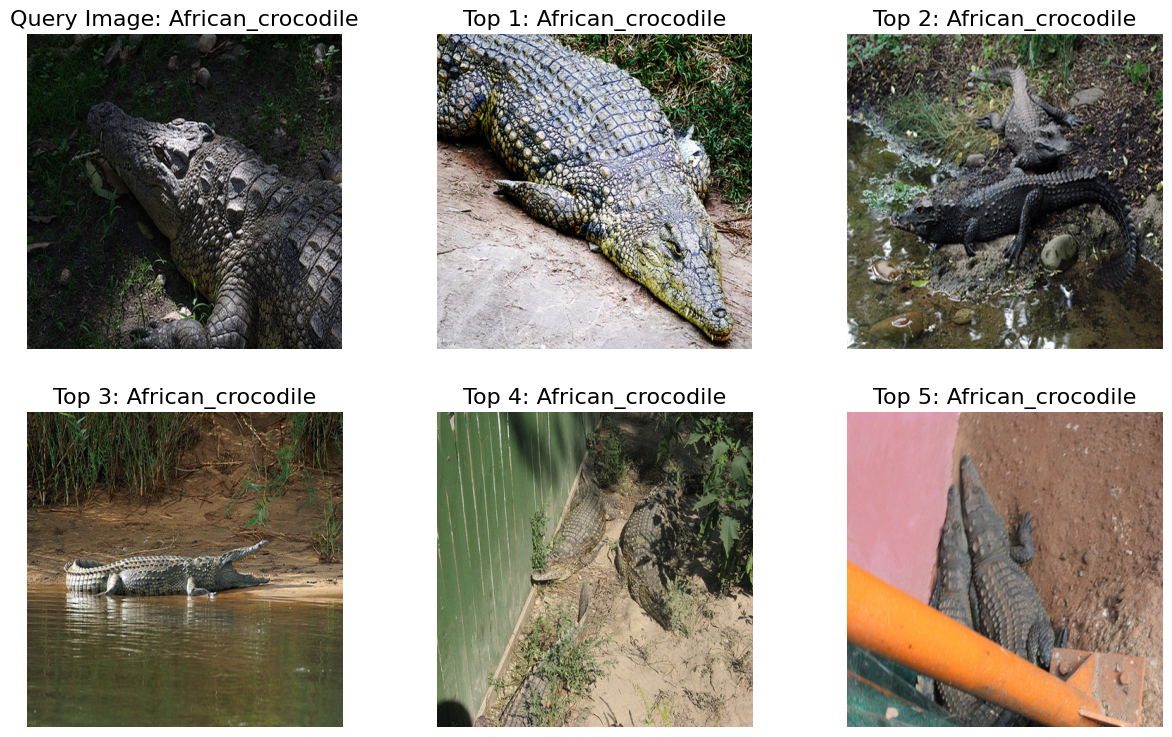

In [19]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_score(root_img_path, query_path, size, absolute_difference)
plot_results(query_path, ls_path_score, reverse=False)

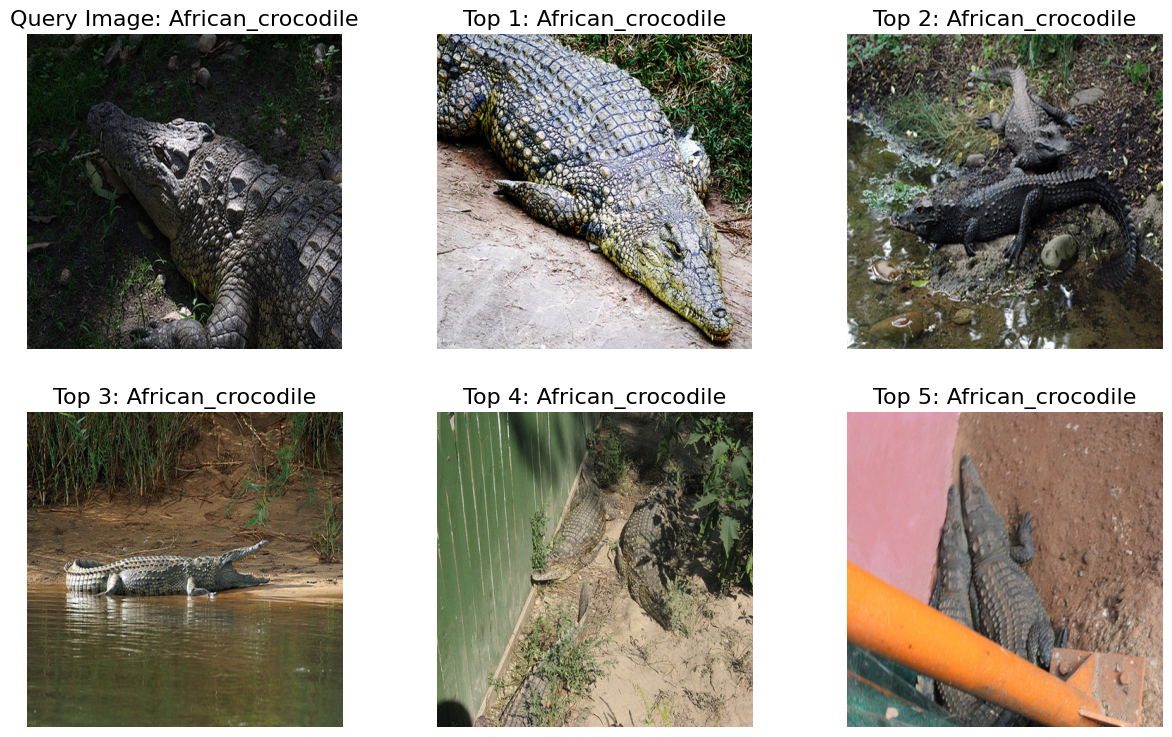

In [20]:
query, ls_path_score = get_score(root_img_path, query_path, size, mean_square_difference)
plot_results(query_path, ls_path_score, reverse=False)

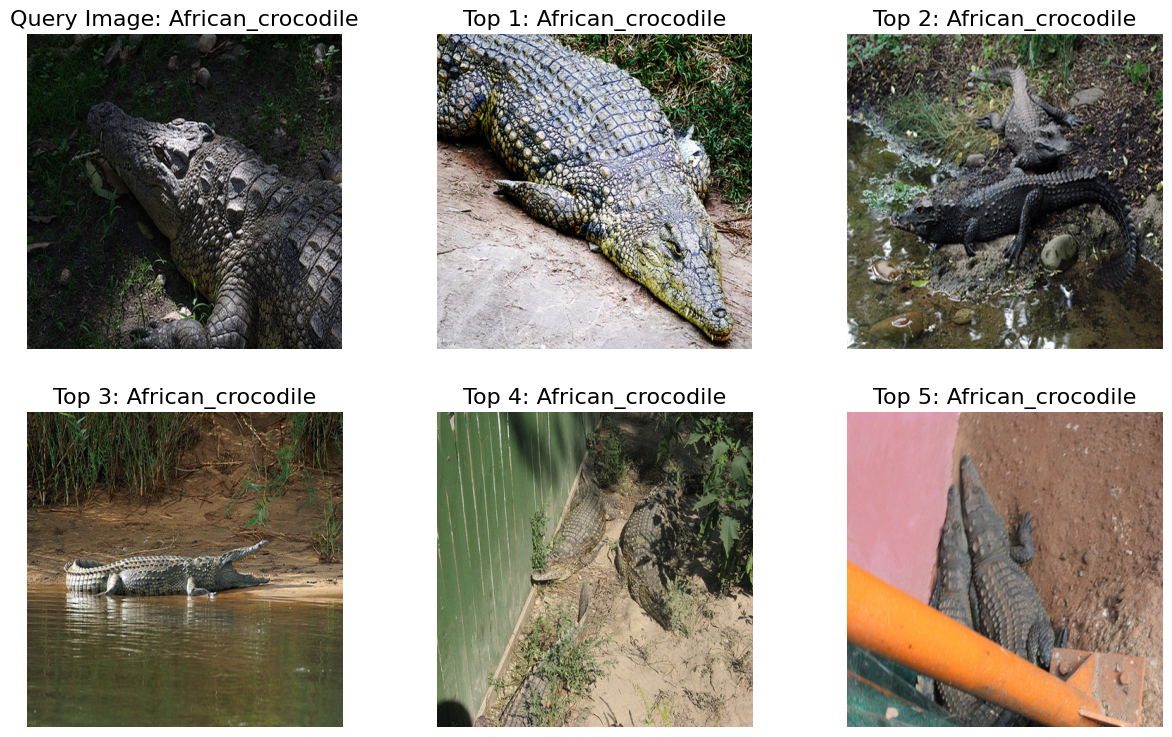

In [40]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_score(root_img_path, query_path, size, cosine_similarity)
plot_results(query_path, ls_path_score, reverse=True)

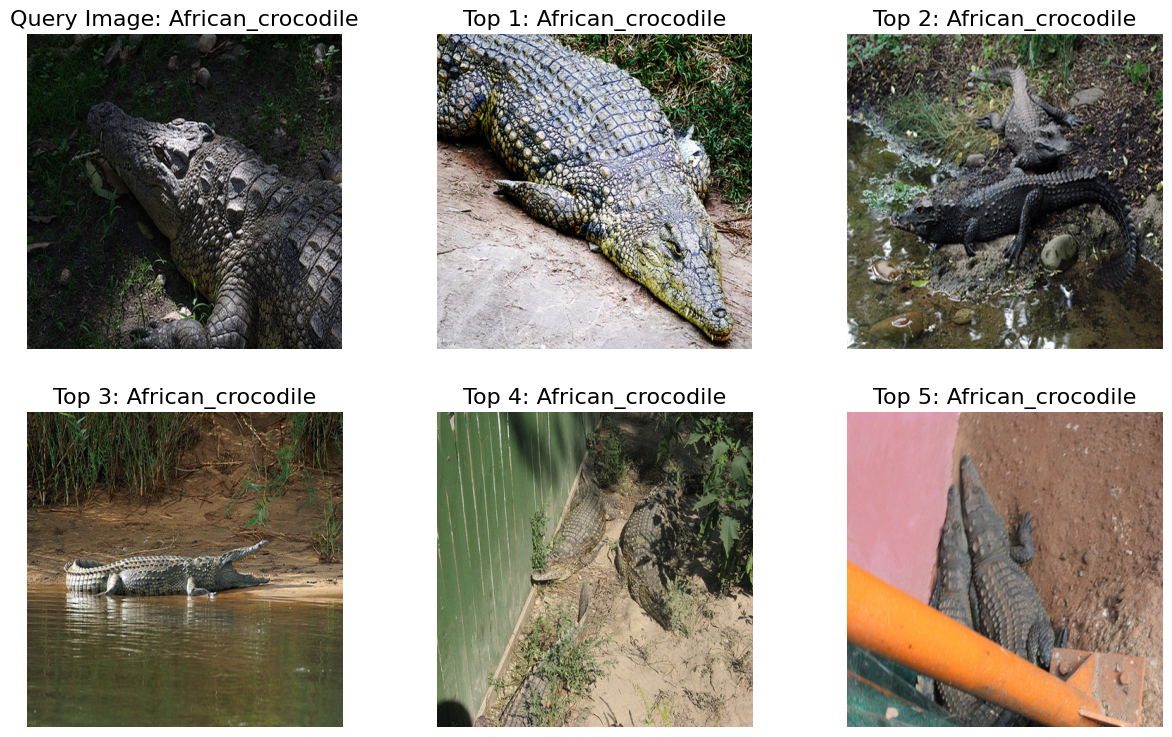

In [42]:
query, ls_path_score = get_score(root_img_path, query_path, size, correlation_coefficient)
plot_results(query_path, ls_path_score, reverse=True)